Bryan Jay - 260738764

# 2 - Image Classification 
### 2.1 Coding Questions



##### Q1 - Resize Images 

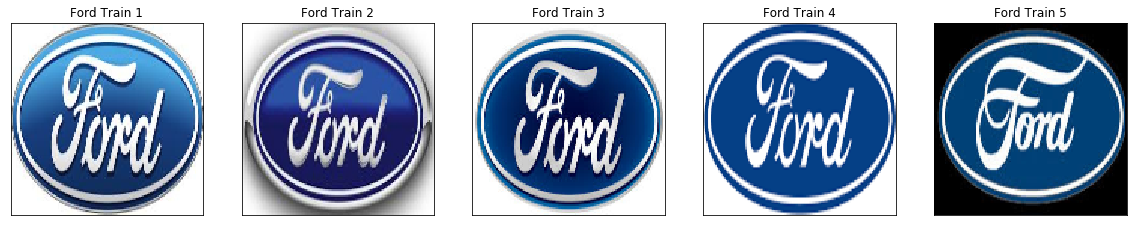

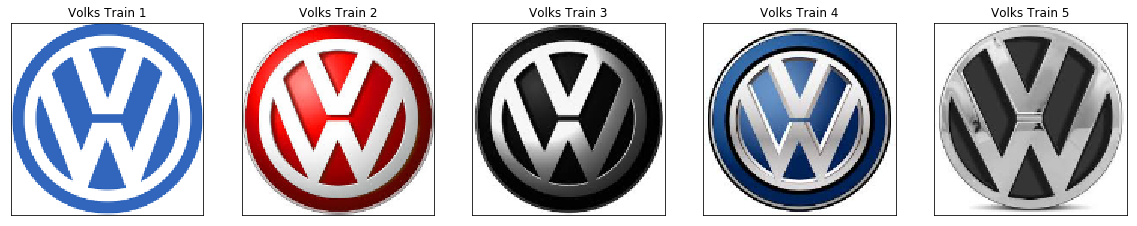

In [50]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# read all the images into a list
ford_train = list()
volks_train = list()

ford_train.append(cv2.imread('./dataset/ford_train1.jpeg'))
ford_train.append(cv2.imread('./dataset/ford_train2.jpeg'))
ford_train.append(cv2.imread('./dataset/ford_train3.jpeg'))
ford_train.append(cv2.imread('./dataset/ford_train4.png'))
ford_train.append(cv2.imread('./dataset/ford_train5.jpeg'))

volks_train.append(cv2.imread('./dataset/volks_train1.png'))
volks_train.append(cv2.imread('./dataset/volks_train2.jpeg'))
volks_train.append(cv2.imread('./dataset/volks_train3.jpeg'))
volks_train.append(cv2.imread('./dataset/volks_train4.jpeg'))
volks_train.append(cv2.imread('./dataset/volks_train5.jpeg'))

ford_test = cv2.imread('./dataset/ford_test.jpeg')
volks_test = cv2.imread('./dataset/volks_test.jpeg')

# resize the images 
for i in range(len(ford_train)):
    ford_train[i] = cv2.resize(ford_train[i], (128, 128))
    
for i in range(len(volks_train)):
    volks_train[i] = cv2.resize(volks_train[i], (128, 128))

plt.figure(figsize=(20,20))
subplot_i = 151
for i in range(len(ford_train)):
    plt.subplot(subplot_i+i), plt.imshow(cv2.cvtColor(ford_train[i], cv2.COLOR_BGR2RGB))
    index = i + 1
    plt.title('Ford Train ' + str(index)), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
subplot_i = 151
for i in range(len(volks_train)):
    plt.subplot(subplot_i+i), plt.imshow(cv2.cvtColor(volks_train[i], cv2.COLOR_BGR2RGB))
    index = i + 1
    plt.title('Volks Train ' + str(index)), plt.xticks([]), plt.yticks([])
plt.show()


##### Q2 - Compute HoG Features 

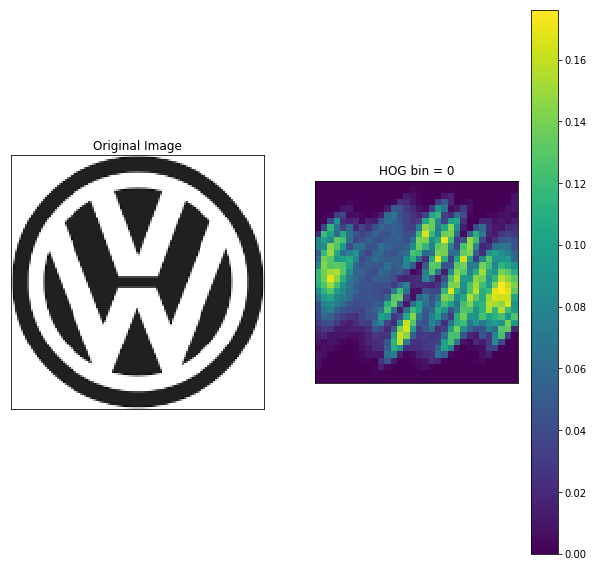

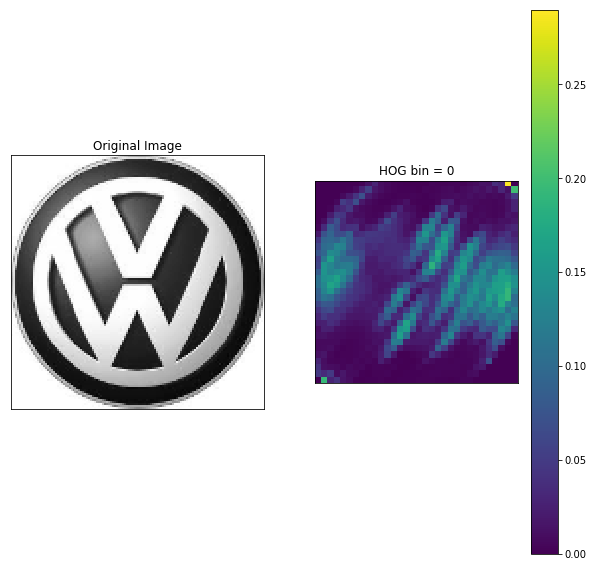

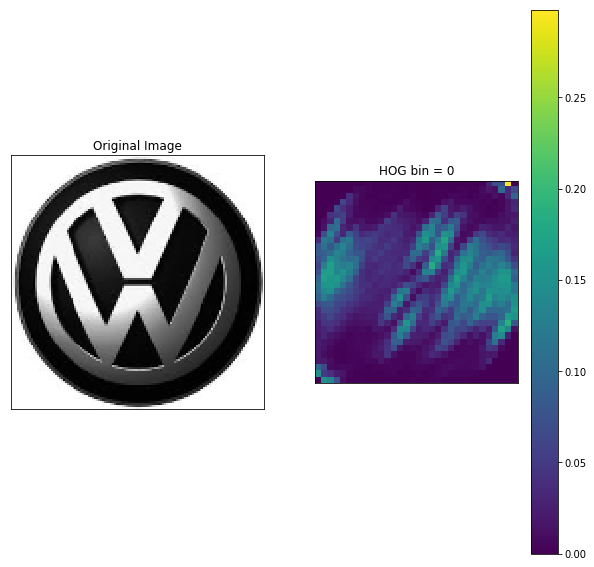

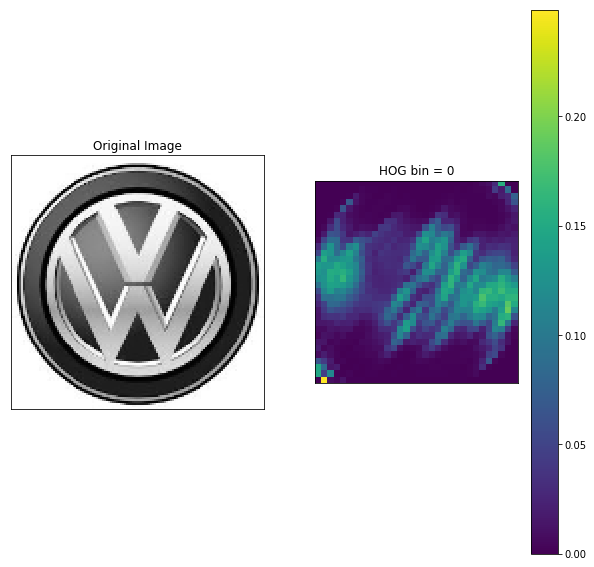

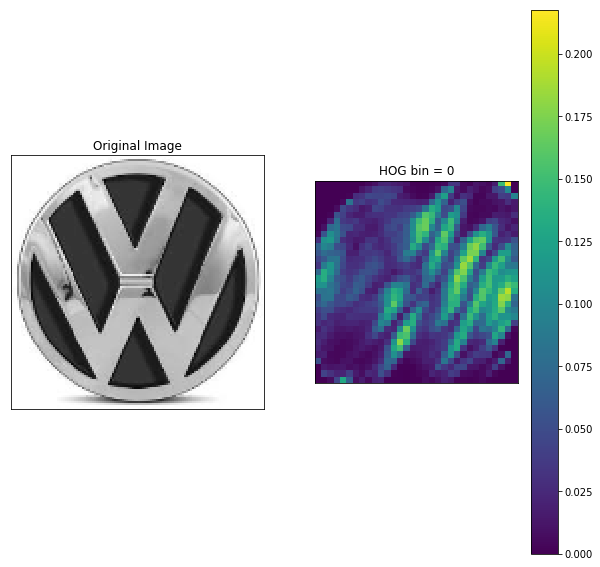

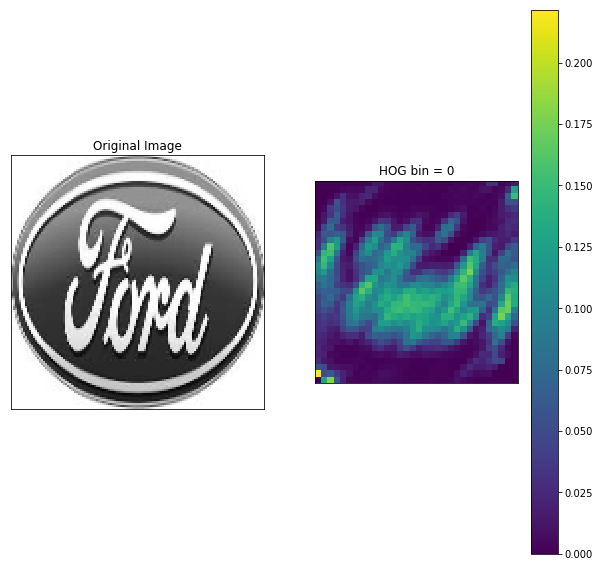

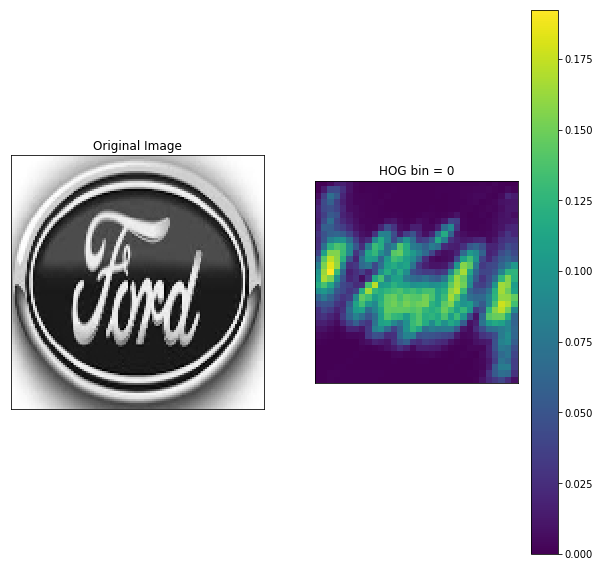

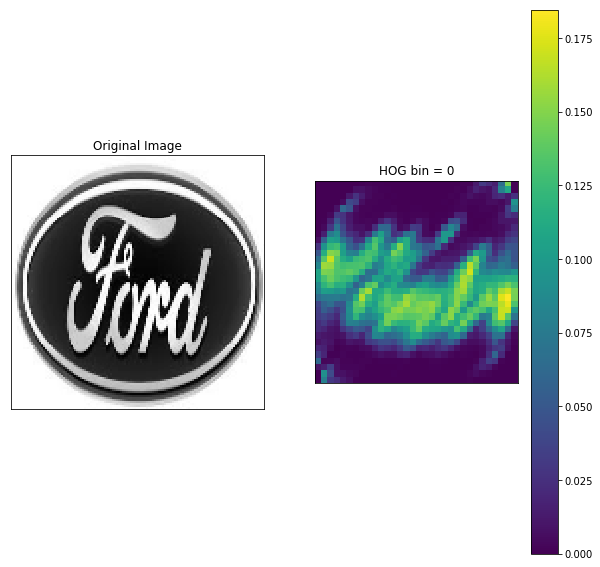

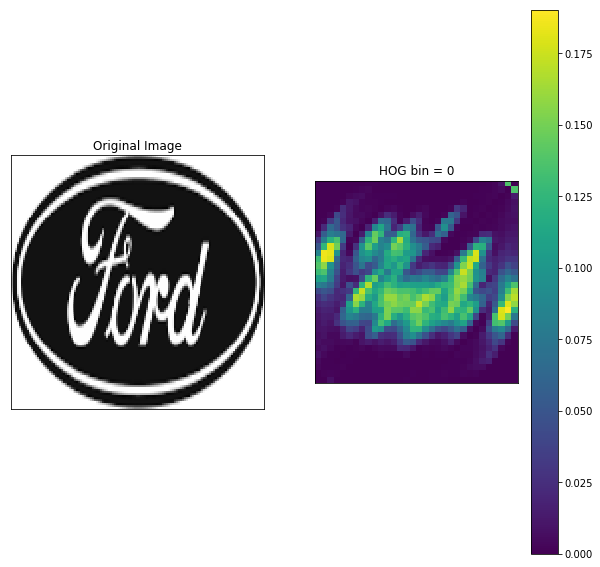

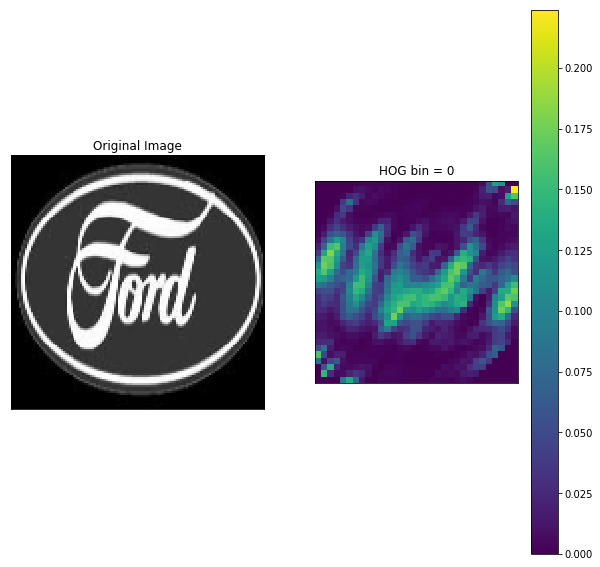

In [52]:
# compute the HoG features
""" HoG Features """
def hogFeatures(img, cell_size, block_size, nbins):
    """
    Find all the HoG features of an image.
    :param img: image
    :param cell_size: Tuple of size of the cell in pixels 
    :param block_size: Tuple of the size of a block in cells
    :param nbins: Integer of the number of oriantation bins
    :return: gradient
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # create the HoG object
    # winSize is the size of the image cropped to an multiple of the cell size
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
    
    # Compute HoG features
    hog_feats = hog.compute(img)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
    # hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.
    
    # computation for BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
    gradients /= cell_count

    return gradients

cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4) # h x w in cells
nbins = 8 # number of orientation bins

volks_HoG = list()
for volks in volks_train:
    temp = hogFeatures(volks, cell_size, block_size, nbins)
    volks_HoG = (volks, temp)
    
    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(volks_HoG[0], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(volks_HoG[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
ford_HoG = list()
for ford in ford_train:
    temp = hogFeatures(ford, cell_size, block_size, nbins)
    ford_HoG = (ford, temp)
    
    # Preview
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(ford_HoG[0], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.title("Original Image"), plt.xticks([]), plt.yticks([])
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(ford_HoG[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    



##### Q3 - Fit a nearest neighbour classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbours = KNeighborsClassifier()

#### Reasoning Questions 
##### Question 1 


##### Question 2
